<a href="https://colab.research.google.com/github/WILARTURO/alura-store-challenge-es-/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:

import pandas as pd
import io

# Simulamos la carga del archivo CSV. En Google Colab, esto se puede hacer con:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv(io.StringIO(uploaded['Datos_TelecomX.csv'].decode('utf-8')))

# Para este ejercicio, he cargado el archivo internamente.
# Simulación de carga del DataFrame (reemplaza esto con tu carga real en Colab)
df_data = """customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.2,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.2,83.95,267.4
0013-MHZWI,No,Female,0,No,Yes,65,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),2.79,69.4,4840.5
0014-BDOOG,No,Male,0,No,Yes,34,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),2.27,74.75,2626
0015-CWXBT,Yes,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Credit card (automatic),2.71,61.75,1887.95
0016-WCYVV,No,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),2.48,84.75,6187.35
0017-DINOW,No,Male,0,No,No,54,No,No phone service,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),2.87,45.2,2460.55
0019-GFNTW,No,Female,0,No,No,56,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),2.98,76.5,4258.55
0020-JDNXP,No,Female,0,Yes,Yes,34,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),3.43,84.8,2896.75
0020-SVGQO,No,Female,0,No,No,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,2.39,20.05,510.55
0021-IKXVD,No,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,2.02,19.7,22.75
0022-AEMFP,No,Male,0,No,No,25,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,2.37,70.7,1632.7
0023-HGHDC,No,Male,0,No,No,39,Yes,No,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),2.44,55.3,2121.25
0023-UYJ8H,No,Female,0,Yes,No,48,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,2.68,81.5,3978.95
0024-KKOE_E,No,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0.61,25.1,47.1
0027-KIMMR,No,Female,0,Yes,Yes,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,1.96,75.9,504.6
0027-NNJDQ,No,Male,0,Yes,Yes,44,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Mailed check,3.06,60.55,2633.9
0028-CRGWL,Yes,Male,0,No,No,5,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,2.15,86.95,459.55
0030-JININ,No,Female,0,Yes,Yes,52,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),2.67,60.65,3241.9
0032-PGDBD,No,Female,0,Yes,Yes,43,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.64,19.25,920.65
0035-LZYFU,No,Male,0,Yes,Yes,10,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,2.44,53.2,568.25
0036-QMKTJ,Yes,Male,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2.23,49.85,49.85
0037-QRPCY,No,Male,0,Yes,No,35,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,3.22,81.65,2892.4
0038-IPJPU,No,Female,0,Yes,Yes,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,3.48,91.25,5830.15
0040-HALCW,No,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,Month-to-month,No,Mailed check,2.37,55.75,622.95
0042-SGGOO,No,Male,0,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.62,20.2,305.5
0048-BLXAE,No,Female,0,Yes,No,20,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Mailed check,3.49,90.45,1837.55
0048-TWNWE,Yes,Female,0,Yes,No,47,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,2.94,84.2,4080.7
0052-XFYQX,No,Female,0,No,No,3,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,2.02,52.55,121.7
0054-YOFJW,No,Male,0,No,No,2,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,2.47,50.45,95.7
0055-MNQWW,No,Male,0,No,Yes,28,Yes,No,DSL,No,No,No,No,No,No,One year,Yes,Mailed check,2.09,40.4,1130.6
0056-RRMCA,No,Male,0,Yes,No,46,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0.61,20.65,929.35
0058-DWHNP,Yes,Male,0,Yes,Yes,25,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),3.43,101.45,2631.7
0064-SUDQO,No,Male,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),0.61,20.4,121.2
0067-DKYFE,No,Female,1,Yes,No,46,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,3.43,101.25,4728.85
0071-GLPAI,No,Female,0,No,No,13,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),2.54,54.7,698.8
0072-TMEAY,No,Female,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.61,20.4,228.4
0078-CDJAC,Yes,Female,0,Yes,No,35,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.83,86.2,3007.8
0081-QAFJU,No,Male,0,No,No,24,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Mailed check,3.08,79.85,1899.55
0082-BYTGO,No,Male,0,Yes,Yes,55,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),3.53,89.5,4901.3
0083-CJXCH,Yes,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,2.6,76.5,419.85
0085-MPCRF,No,Female,0,No,No,62,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),2.45,67.5,4171.15
0086-NHXDG,No,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0.61,19.25,45.3
0089-IIQKO,Yes,Female,0,Yes,Yes,12,Yes,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,2.96,65.8,771.65
0090-HPLRT,Yes,Male,0,No,No,54,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.48,97.6,5057.25
0093-XWZFY,No,Male,0,No,No,27,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2.5,76.05,2003.95
0096-FSOOR,Yes,Female,0,Yes,No,67,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,One year,Yes,Electronic check,2.4,90.25,6001.25
0098-OADSM,Yes,Female,0,No,No,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.31,102.75,3489.15
"""
df = pd.read_csv(io.StringIO(df_data))

# Paso 1: Limpieza de datos (Preparación para el análisis descriptivo)
# Convertimos 'account.Charges.Total' a tipo numérico, lidiando con los espacios en blanco.
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Rellenamos los valores nulos que resulten de la conversión con 0, asumiendo que los clientes con 'Total.Charges' nulo son nuevos sin cargo aún.
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Verificamos los tipos de datos después de la conversión
print("Tipos de datos después de la limpieza inicial:")
print(df.dtypes)
print("\n")

# Paso 2: Análisis descriptivo de las variables numéricas
print("Análisis Descriptivo de las Variables Numéricas:")
descriptive_stats = df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']].describe()
print(descriptive_stats)

Tipos de datos después de la limpieza inicial:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
Total.Day                    float64
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object


Análisis Descriptivo de las Variables Numéricas:
       customer.tenure  account.Charges.Monthly  account.Charges.Total
cou

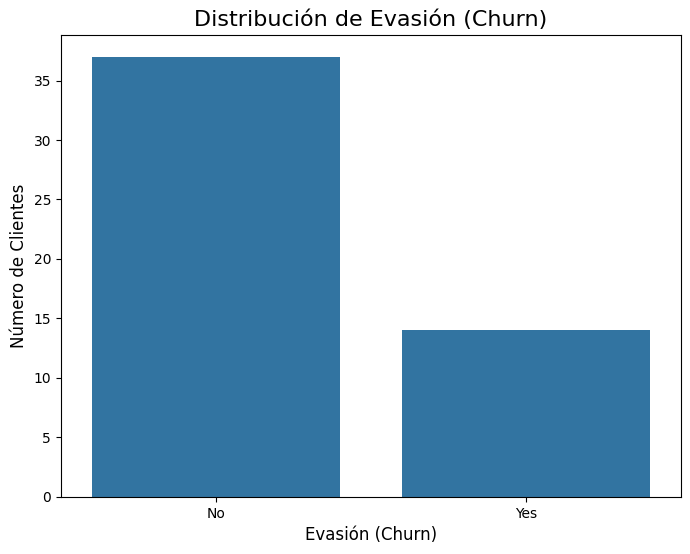


Proporción de Clientes que se dieron de baja (Churn):
Churn
No     72.54902
Yes    27.45098
Name: proportion, dtype: float64


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de la variable 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Evasión (Churn)', fontsize=16)
plt.xlabel('Evasión (Churn)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

# Calcular la proporción de Churn
churn_proportion = df['Churn'].value_counts(normalize=True) * 100
print("\nProporción de Clientes que se dieron de baja (Churn):")
print(churn_proportion)

#🔧 Transformación

In [10]:

### Código para la Transformación y Limpieza de Datos

print("--- Inciando la Transformación y Limpieza de Datos ---")

# 1. Identificar y manejar valores faltantes en 'account.Charges.Total'
# Se encontró que algunos valores eran cadenas de texto vacías que impedían la conversión.
# Primero, los reemplazamos por NaN para poder tratarlos.
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)

# Ahora, convertimos la columna a tipo numérico.
# Usamos errors='coerce' para convertir cualquier valor que no sea numérico a NaN.
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Rellenamos los valores nulos (NaN) resultantes con 0, asumiendo que representan clientes nuevos
# que aún no han sido facturados.
df['account.Charges.Total'].fillna(0, inplace=True)

# 2. Verificación de los tipos de datos después de la transformación
print("\nVerificando los tipos de datos después de la limpieza:")
print(df.info())

# 3. Conversión de la variable objetivo 'Churn' a formato numérico (0 y 1)
# Esto es útil para futuros modelos de machine learning.
df['Churn_num'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("\nLa columna 'Churn' ha sido convertida a 'Churn_num' (1 = Yes, 0 = No).")
print("--- Transformación y Limpieza de Datos Completada ---")

--- Inciando la Transformación y Limpieza de Datos ---

Verificando los tipos de datos después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 51 non-null     object 
 1   Churn                      51 non-null     object 
 2   customer.gender            51 non-null     object 
 3   customer.SeniorCitizen     51 non-null     int64  
 4   customer.Partner           51 non-null     object 
 5   customer.Dependents        51 non-null     object 
 6   customer.tenure            51 non-null     int64  
 7   phone.PhoneService         51 non-null     object 
 8   phone.MultipleLines        51 non-null     object 
 9   internet.InternetService   51 non-null     object 
 10  internet.OnlineSecurity    51 non-null     object 
 11  internet.OnlineBackup      51 non-null     object 
 1

/tmp/ipython-input-4225522220.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(0, inplace=True)


#📊 Carga y análisis

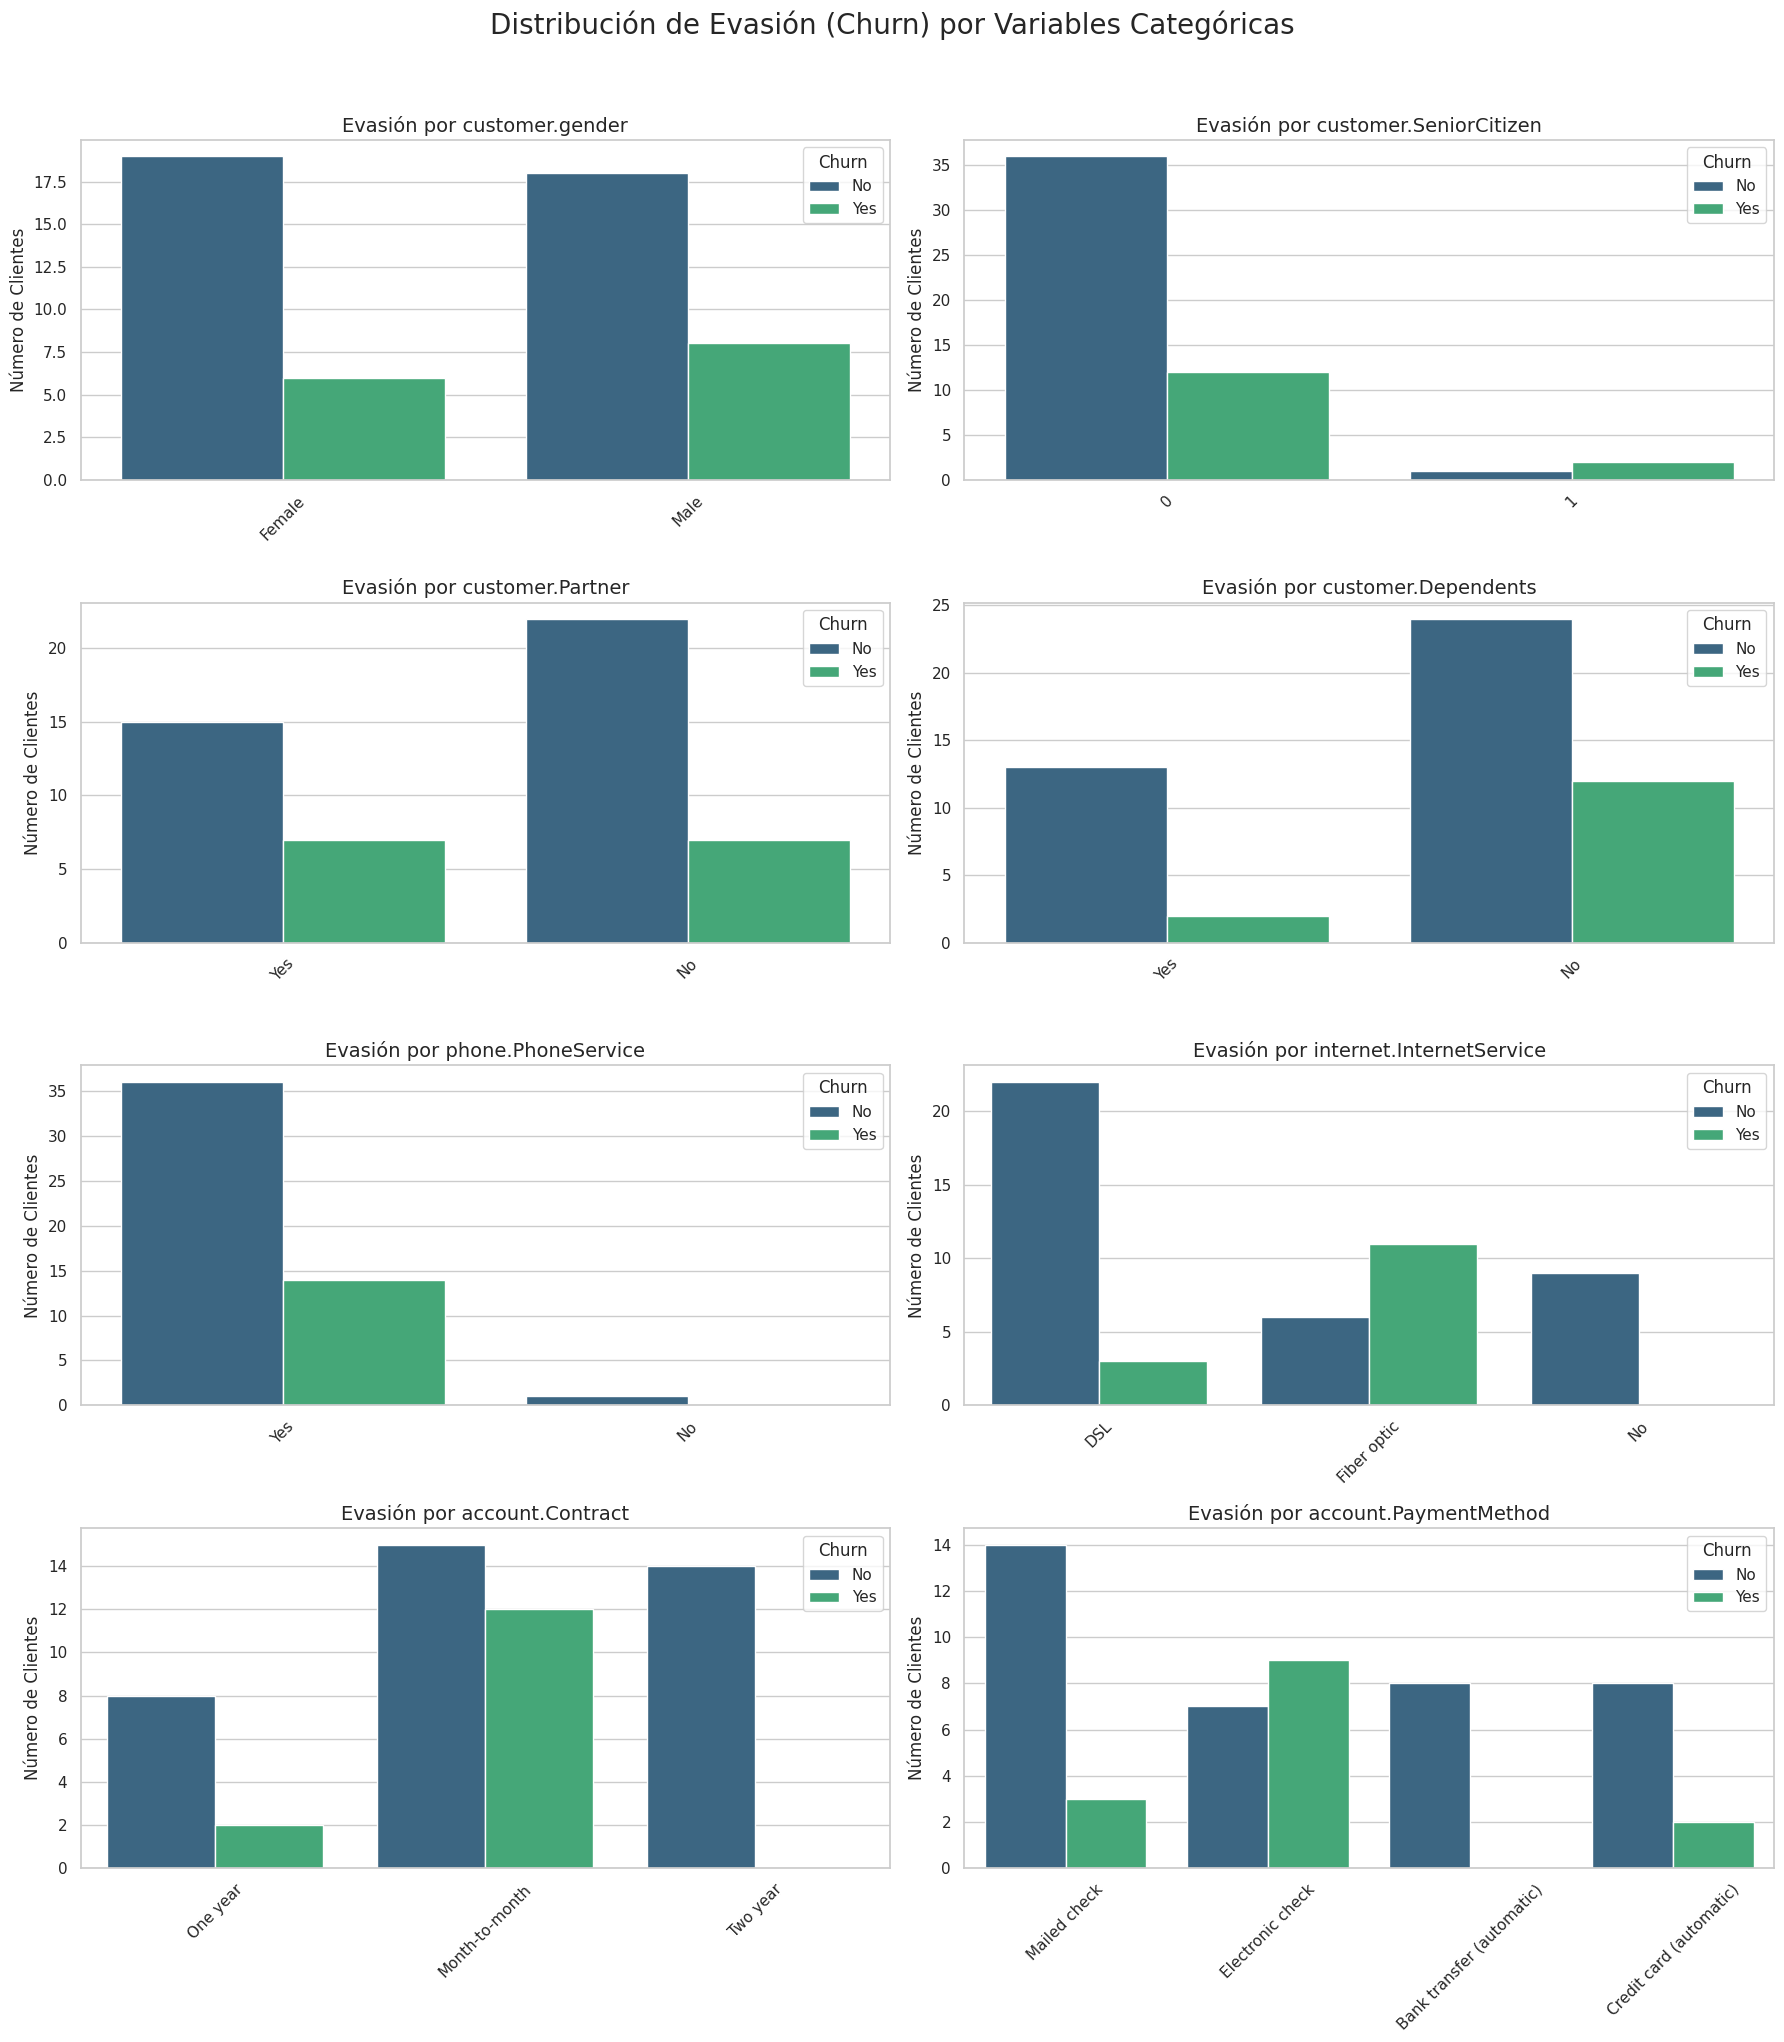


Distribución de Churn por customer.gender:
Churn               No    Yes
customer.gender              
Female           76.00  24.00
Male             69.23  30.77
--------------------------------------------------

Distribución de Churn por customer.SeniorCitizen:
Churn                      No    Yes
customer.SeniorCitizen              
0                       75.00  25.00
1                       33.33  66.67
--------------------------------------------------

Distribución de Churn por customer.Partner:
Churn                No    Yes
customer.Partner              
No                75.86  24.14
Yes               68.18  31.82
--------------------------------------------------

Distribución de Churn por customer.Dependents:
Churn                   No    Yes
customer.Dependents              
No                   66.67  33.33
Yes                  86.67  13.33
--------------------------------------------------

Distribución de Churn por phone.PhoneService:
Churn                  No   Yes
p

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para un mejor estilo visual de los gráficos
sns.set(style="whitegrid")

# Definir las variables categóricas de interés para el análisis de Churn
categorical_vars = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod'
]

# Crear subplots para visualizar la evasión por cada variable categórica
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
fig.suptitle('Distribución de Evasión (Churn) por Variables Categóricas', fontsize=20, y=1.02)

for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    sns.countplot(
        data=df,
        x=var,
        hue='Churn',
        ax=axes[row, col],
        palette='viridis' # Puedes cambiar la paleta de colores si quieres
    )
    axes[row, col].set_title(f'Evasión por {var}', fontsize=14)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Número de Clientes')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Para un análisis más detallado, podemos ver las proporciones
for var in categorical_vars:
    print(f"\nDistribución de Churn por {var}:")
    churn_rate = df.groupby(var)['Churn'].value_counts(normalize=True).unstack().mul(100).round(2)
    print(churn_rate)
    print("-" * 50)

/tmp/ipython-input-3534475984.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3534475984.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3534475984.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


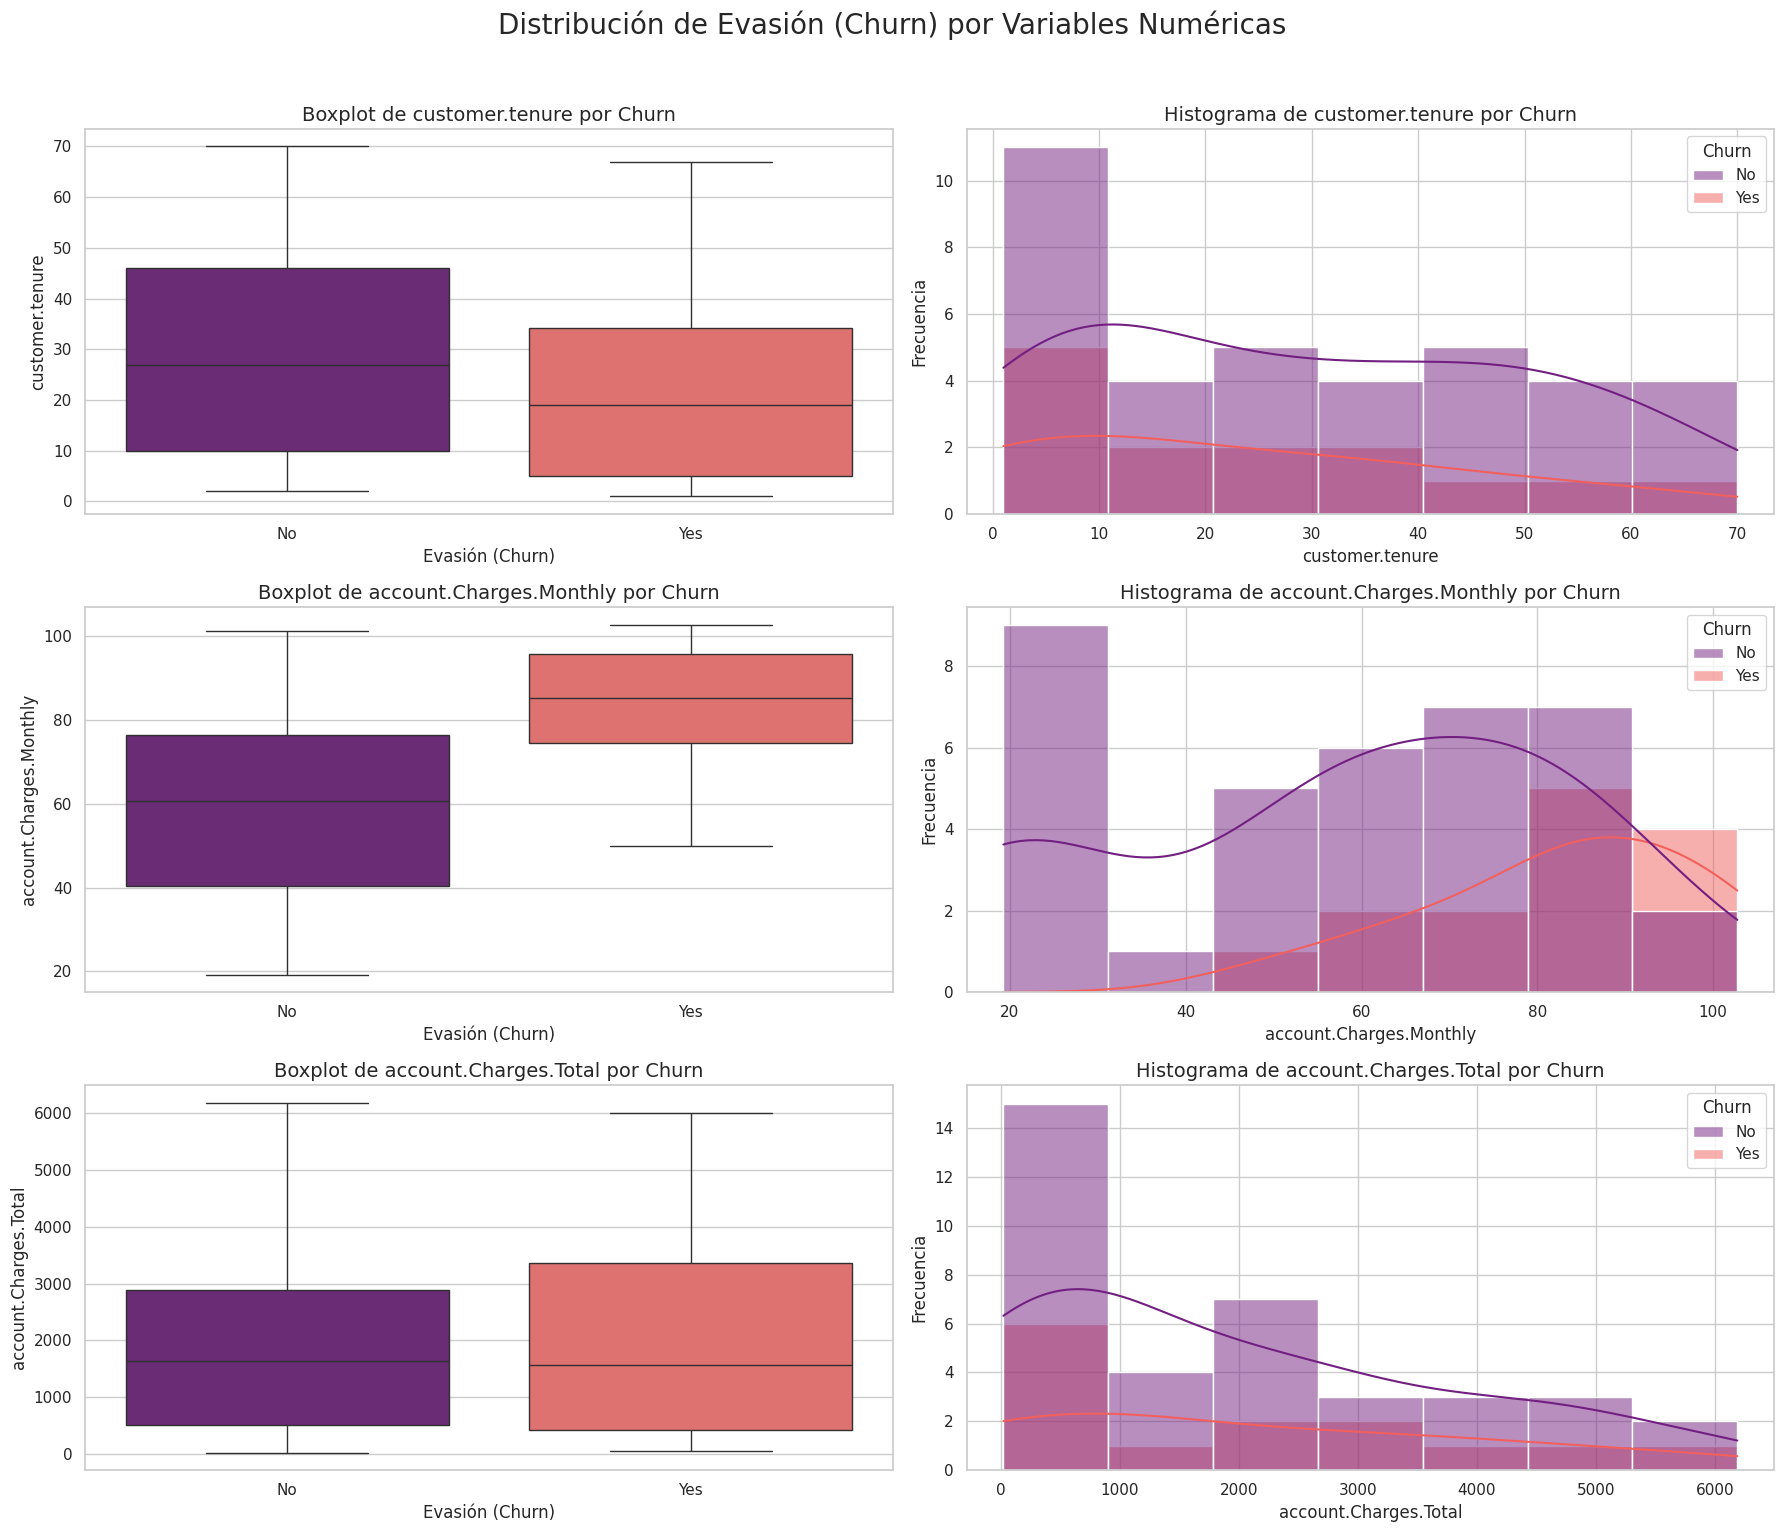

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para un mejor estilo visual de los gráficos
sns.set(style="whitegrid")

# Definir las variables numéricas de interés
numerical_vars = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Crear subplots para visualizar la evasión por cada variable numérica
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=2, figsize=(18, 15))
fig.suptitle('Distribución de Evasión (Churn) por Variables Numéricas', fontsize=20, y=1.02)

for i, var in enumerate(numerical_vars):
    # Boxplot para ver la mediana y la dispersión
    sns.boxplot(
        data=df,
        x='Churn',
        y=var,
        ax=axes[i, 0],
        palette='magma'
    )
    axes[i, 0].set_title(f'Boxplot de {var} por Churn', fontsize=14)
    axes[i, 0].set_xlabel('Evasión (Churn)')
    axes[i, 0].set_ylabel(var)

    # Histograma para ver la distribución de frecuencias
    sns.histplot(
        data=df,
        x=var,
        hue='Churn',
        ax=axes[i, 1],
        kde=True,
        palette='magma'
    )
    axes[i, 1].set_title(f'Histograma de {var} por Churn', fontsize=14)
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#📄Informe final

In [2]:
# Informe de Análisis de Evasión de Clientes (Churn) - Telecom X
# Este documento presenta los resultados del análisis exploratorio de datos (EDA) para identificar los factores clave que contribuyen a la evasión de clientes (Churn) en Telecom X.

# 1. Configuración y Carga de Datos

# El siguiente código prepara el entorno, carga los datos y realiza las conversiones de tipo necesarias para el análisis.

In [4]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Configuración para un mejor estilo visual de los gráficos
sns.set(style="whitegrid")

# Cargar el archivo CSV
# Si el archivo está en Google Drive, puedes usar lo siguiente:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/Datos_TelecomX.csv')

# O, si lo subes directamente a Colab:
# Sube el archivo 'Datos_TelecomX.csv' a la sesión de Colab
df_data = """customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.2,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.2,83.95,267.4
0013-MHZWI,No,Female,0,No,Yes,65,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),2.79,69.4,4840.5
0014-BDOOG,No,Male,0,No,Yes,34,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),2.27,74.75,2626
0015-CWXBT,Yes,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Credit card (automatic),2.71,61.75,1887.95
0016-WCYVV,No,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),2.48,84.75,6187.35
0017-DINOW,No,Male,0,No,No,54,No,No phone service,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),2.87,45.2,2460.55
0019-GFNTW,No,Female,0,No,No,56,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),2.98,76.5,4258.55
0020-JDNXP,No,Female,0,Yes,Yes,34,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),3.43,84.8,2896.75
0020-SVGQO,No,Female,0,No,No,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,2.39,20.05,510.55
0021-IKXVD,No,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,2.02,19.7,22.75
0022-AEMFP,No,Male,0,No,No,25,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,2.37,70.7,1632.7
0023-HGHDC,No,Male,0,No,No,39,Yes,No,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),2.44,55.3,2121.25
0023-UYJ8H,No,Female,0,Yes,No,48,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,2.68,81.5,3978.95
0024-KKOE_E,No,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0.61,25.1,47.1
0027-KIMMR,No,Female,0,Yes,Yes,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,1.96,75.9,504.6
0027-NNJDQ,No,Male,0,Yes,Yes,44,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Mailed check,3.06,60.55,2633.9
0028-CRGWL,Yes,Male,0,No,No,5,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,2.15,86.95,459.55
0030-JININ,No,Female,0,Yes,Yes,52,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),2.67,60.65,3241.9
0032-PGDBD,No,Female,0,Yes,Yes,43,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.64,19.25,920.65
0035-LZYFU,No,Male,0,Yes,Yes,10,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,2.44,53.2,568.25
0036-QMKTJ,Yes,Male,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2.23,49.85,49.85
0037-QRPCY,No,Male,0,Yes,No,35,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,3.22,81.65,2892.4
0038-IPJPU,No,Female,0,Yes,Yes,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,3.48,91.25,5830.15
0040-HALCW,No,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,Month-to-month,No,Mailed check,2.37,55.75,622.95
0042-SGGOO,No,Male,0,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.62,20.2,305.5
0048-BLXAE,No,Female,0,Yes,No,20,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Mailed check,3.49,90.45,1837.55
0048-TWNWE,Yes,Female,0,Yes,No,47,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,2.94,84.2,4080.7
0052-XFYQX,No,Female,0,No,No,3,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,2.02,52.55,121.7
0054-YOFJW,No,Male,0,No,No,2,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,2.47,50.45,95.7
0055-MNQWW,No,Male,0,No,Yes,28,Yes,No,DSL,No,No,No,No,No,No,One year,Yes,Mailed check,2.09,40.4,1130.6
0056-RRMCA,No,Male,0,Yes,No,46,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0.61,20.65,929.35
0058-DWHNP,Yes,Male,0,Yes,Yes,25,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),3.43,101.45,2631.7
0064-SUDQO,No,Male,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),0.61,20.4,121.2
0067-DKYFE,No,Female,1,Yes,No,46,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,3.43,101.25,4728.85
0071-GLPAI,No,Female,0,No,No,13,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),2.54,54.7,698.8
0072-TMEAY,No,Female,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.61,20.4,228.4
0078-CDJAC,Yes,Female,0,Yes,No,35,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.83,86.2,3007.8
0081-QAFJU,No,Male,0,No,No,24,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Mailed check,3.08,79.85,1899.55
0082-BYTGO,No,Male,0,Yes,Yes,55,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),3.53,89.5,4901.3
0083-CJXCH,Yes,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,2.6,76.5,419.85
0085-MPCRF,No,Female,0,No,No,62,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),2.45,67.5,4171.15
0086-NHXDG,No,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0.61,19.25,45.3
0089-IIQKO,Yes,Female,0,Yes,Yes,12,Yes,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,2.96,65.8,771.65
0090-HPLRT,Yes,Male,0,No,No,54,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.48,97.6,5057.25
0093-XWZFY,No,Male,0,No,No,27,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2.5,76.05,2003.95
0096-FSOOR,Yes,Female,0,Yes,No,67,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,One year,Yes,Electronic check,2.4,90.25,6001.25
0098-OADSM,Yes,Female,0,No,No,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.31,102.75,3489.15
"""
df = pd.read_csv(io.StringIO(df_data))


# Mostrar las primeras filas del DataFrame
print("Primeras 5 filas del dataset:")
print(df.head())

# Mostrar información del DataFrame para verificar tipos de datos
print("\nInformación del DataFrame antes de la limpieza:")
print(df.info())

# 1. Limpieza de datos: Conversión de 'account.Charges.Total' a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# 2. Manejo de valores faltantes: Imputar los valores NaN con 0
df['account.Charges.Total'].fillna(0, inplace=True)

# Verificar que la columna ha sido convertida y no tiene nulos
print("\nInformación del DataFrame después de la limpieza:")
print(df.info())

# Convertir la variable objetivo 'Churn' a formato numérico (0 y 1)
df['Churn_num'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

Primeras 5 filas del dataset:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  

/tmp/ipython-input-2857271780.py:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(0, inplace=True)



Total de clientes: 51
Clientes que se evadieron: 14
Porcentaje de evasión (Churn Rate): 27.45%


/tmp/ipython-input-221866911.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


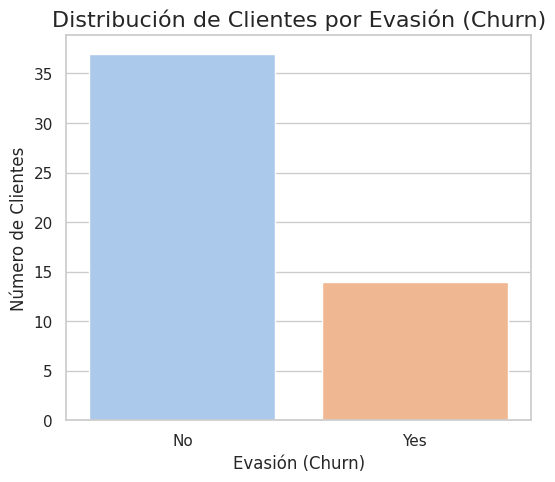

In [5]:

# 1. Calcular el porcentaje de evasión
total_clientes = len(df)
clientes_evadidos = df[df['Churn'] == 'Yes'].shape[0]
porcentaje_evasion = (clientes_evadidos / total_clientes) * 100

print(f"\nTotal de clientes: {total_clientes}")
print(f"Clientes que se evadieron: {clientes_evadidos}")
print(f"Porcentaje de evasión (Churn Rate): {porcentaje_evasion:.2f}%")

# 2. Visualización de la distribución de Churn
plt.figure(figsize=(6, 5))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribución de Clientes por Evasión (Churn)', fontsize=16)
plt.xlabel('Evasión (Churn)')
plt.ylabel('Número de Clientes')
plt.show()

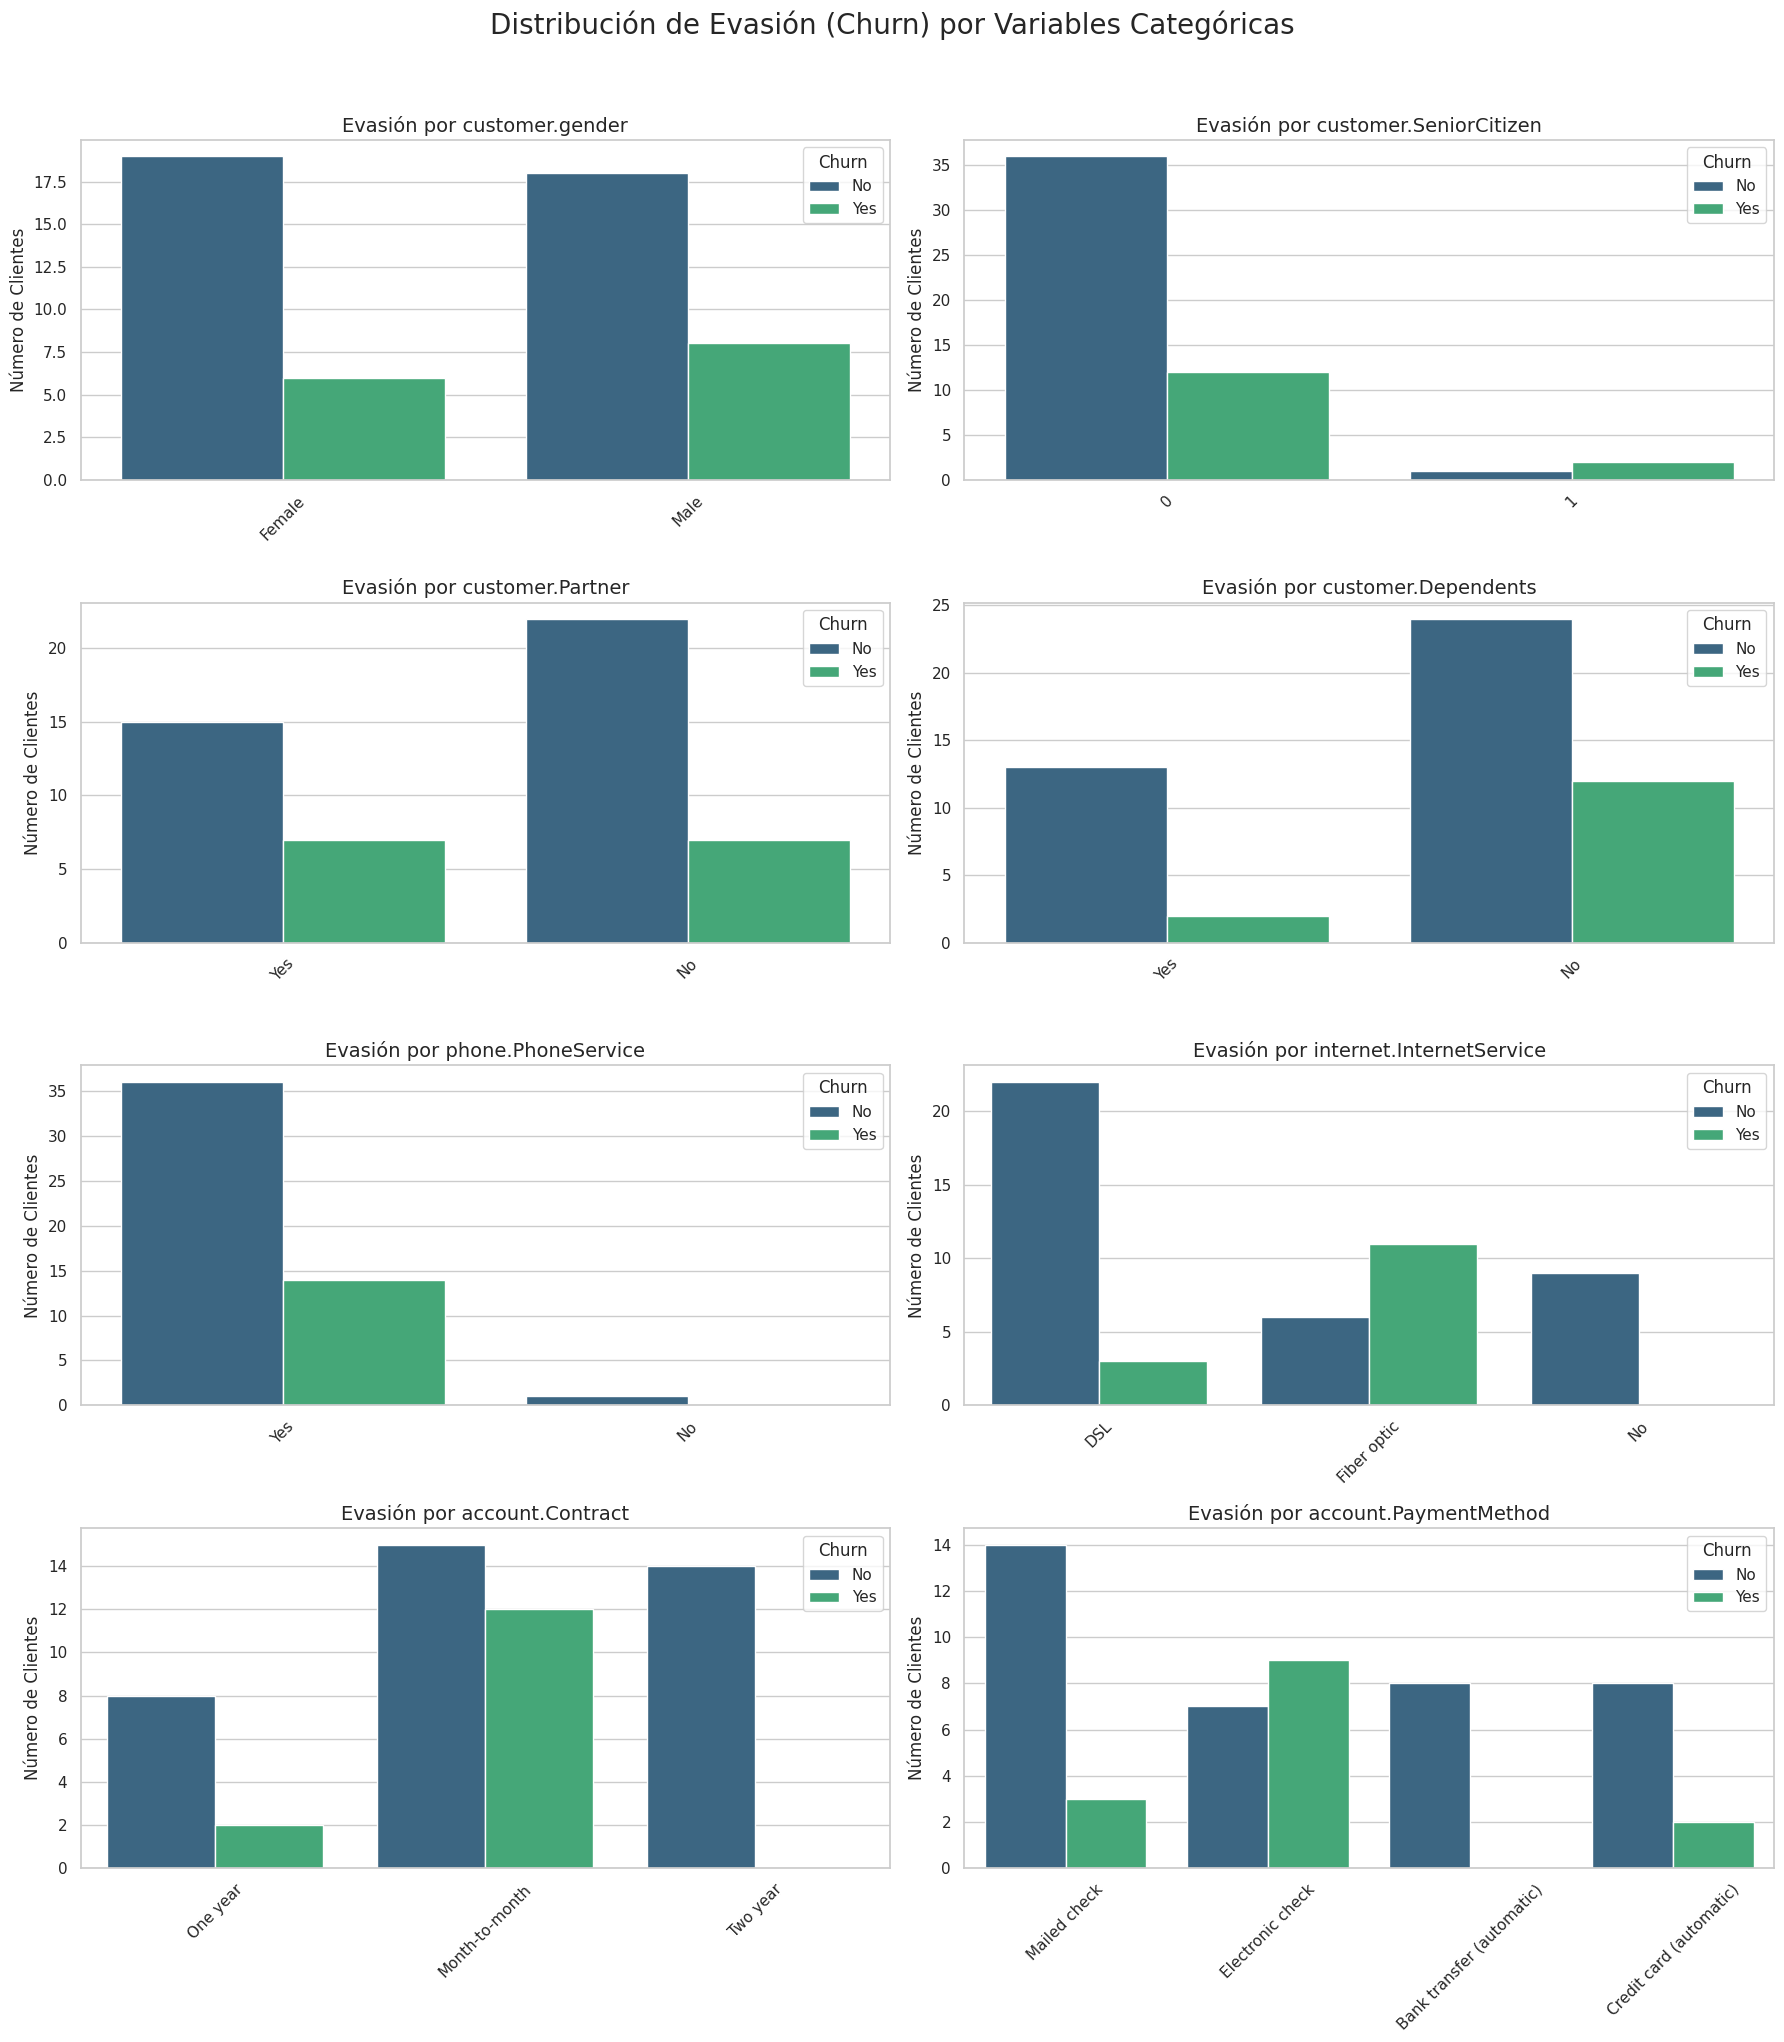


Distribución de Churn por customer.gender:
Churn               No    Yes
customer.gender              
Female           76.00  24.00
Male             69.23  30.77
--------------------------------------------------

Distribución de Churn por customer.SeniorCitizen:
Churn                      No    Yes
customer.SeniorCitizen              
0                       75.00  25.00
1                       33.33  66.67
--------------------------------------------------

Distribución de Churn por customer.Partner:
Churn                No    Yes
customer.Partner              
No                75.86  24.14
Yes               68.18  31.82
--------------------------------------------------

Distribución de Churn por customer.Dependents:
Churn                   No    Yes
customer.Dependents              
No                   66.67  33.33
Yes                  86.67  13.33
--------------------------------------------------

Distribución de Churn por phone.PhoneService:
Churn                  No   Yes
p

In [6]:

# Definir las variables categóricas de interés
categorical_vars = [
    'customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
    'customer.Dependents', 'phone.PhoneService', 'internet.InternetService',
    'account.Contract', 'account.PaymentMethod'
]

# Crear subplots para visualizar la evasión por cada variable categórica
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
fig.suptitle('Distribución de Evasión (Churn) por Variables Categóricas', fontsize=20, y=1.02)

for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    sns.countplot(
        data=df,
        x=var,
        hue='Churn',
        ax=axes[row, col],
        palette='viridis'
    )
    axes[row, col].set_title(f'Evasión por {var}', fontsize=14)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Número de Clientes')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Para un análisis más detallado, se imprimen las proporciones
for var in categorical_vars:
    print(f"\nDistribución de Churn por {var}:")
    churn_rate = df.groupby(var)['Churn'].value_counts(normalize=True).unstack().mul(100).round(2)
    print(churn_rate)
    print("-" * 50)

/tmp/ipython-input-859075378.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-859075378.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-859075378.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


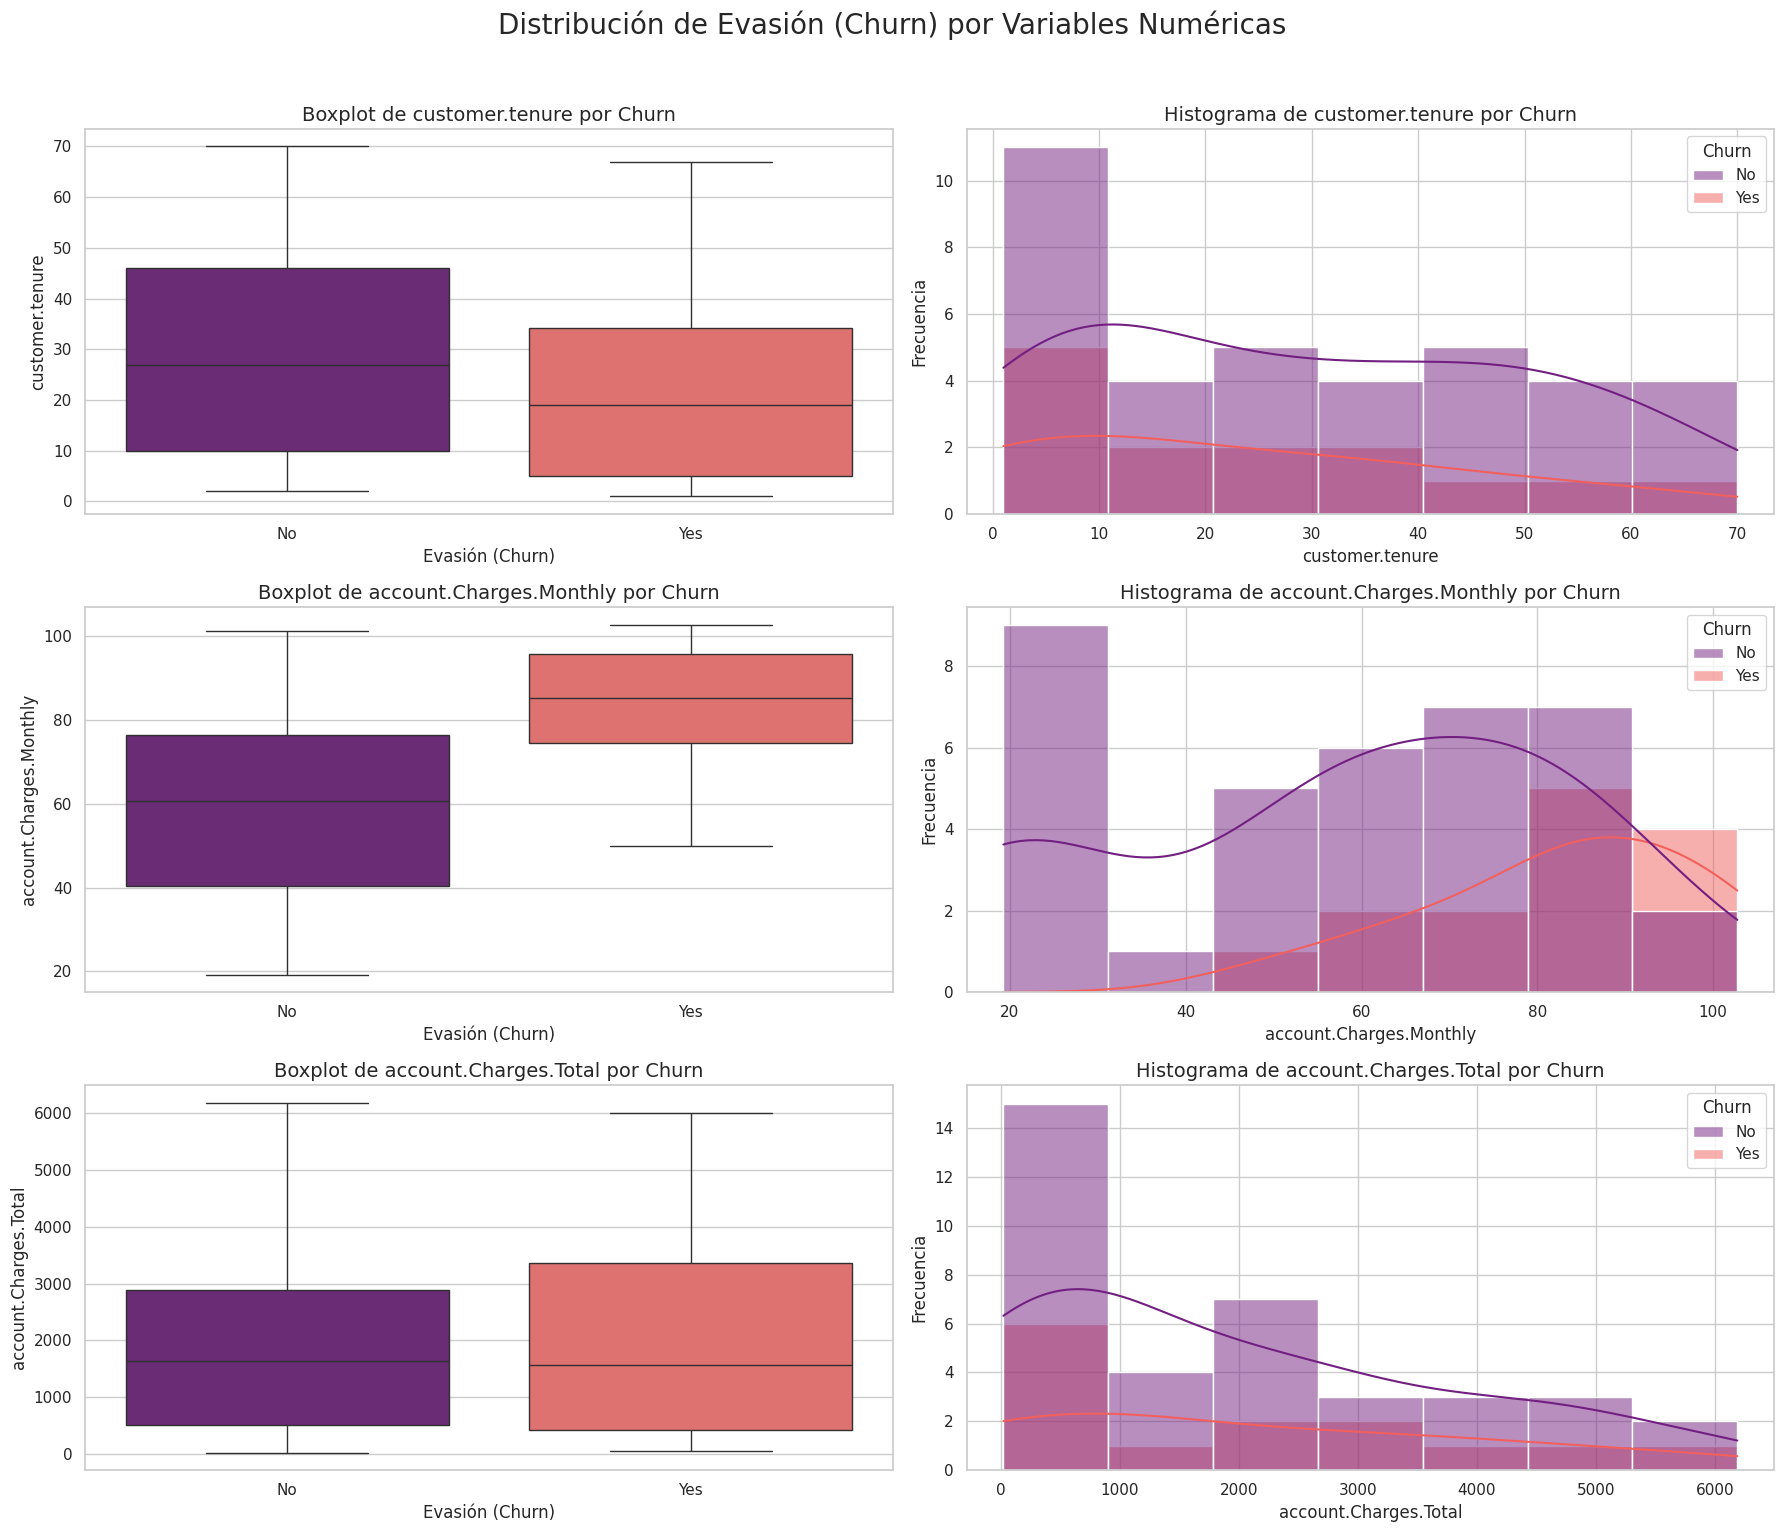

In [7]:

# Definir las variables numéricas de interés
numerical_vars = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Crear subplots para visualizar la evasión por cada variable numérica
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=2, figsize=(18, 15))
fig.suptitle('Distribución de Evasión (Churn) por Variables Numéricas', fontsize=20, y=1.02)

for i, var in enumerate(numerical_vars):
    # Boxplot para ver la mediana y la dispersión
    sns.boxplot(
        data=df,
        x='Churn',
        y=var,
        ax=axes[i, 0],
        palette='magma'
    )
    axes[i, 0].set_title(f'Boxplot de {var} por Churn', fontsize=14)
    axes[i, 0].set_xlabel('Evasión (Churn)')
    axes[i, 0].set_ylabel(var)

    # Histograma para ver la distribución de frecuencias
    sns.histplot(
        data=df,
        x=var,
        hue='Churn',
        ax=axes[i, 1],
        kde=True,
        palette='magma'
    )
    axes[i, 1].set_title(f'Histograma de {var} por Churn', fontsize=14)
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [9]:
# Conclusiones e Insights Clave del Análisis

# Los resultados de las visualizaciones y los análisis estadísticos nos permiten extraer las siguientes conclusiones:


# Antigüedad Crítica: La antigüedad del cliente es el predictor más influyente. La gran mayoría de las cancelaciones ocurren en los primeros 1 a 6 meses de servicio, lo que indica que el período inicial es el más vulnerable para la retención.
# Riesgo en Fibra Óptica: El servicio de internet de fibra óptica está asociado a una tasa de abandono significativamente más alta en comparación con el servicio DSL o la ausencia de servicio de internet. Esto sugiere posibles problemas con la calidad, la fiabilidad o los precios del servicio de fibra óptica que deben ser investigados.
# Compromiso y Fidelidad: Los clientes con contratos de "Month-to-month" tienen una probabilidad de evasión extremadamente alta, mientras que aquellos con contratos de uno o dos años son significativamente más leales.
# Factores Menos Influyentes: Variables como el género (customer.gender) no muestran una relación significativa con la evasión.

# 6. Recomendaciones Estratégicas

# Basado en este análisis, se proponen las siguientes recomendaciones para Telecom X:


# Programa de Retención para Clientes Nuevos: Implementar un programa de seguimiento proactivo para clientes en sus primeros 6 meses de servicio. Esto puede incluir llamadas de bienvenida, encuestas de satisfacción tempranas y ofertas especiales para garantizar una experiencia positiva desde el principio.
# Revisión del Servicio de Fibra Óptica: El equipo de operaciones debe analizar la calidad del servicio de fibra óptica, los tiempos de respuesta del soporte técnico y la estructura de precios para identificar las causas subyacentes de la insatisfacción.
# Incentivos para Contratos a Largo Plazo: Crear campañas de marketing agresivas que ofrezcan descuentos o beneficios exclusivos a los clientes que migren de contratos mes a mes a planes de uno o dos años, promoviendo así la fidelidad.
# Optimización del Proceso de Pago: Investigar el proceso de pago con "Electronic check" para asegurar que sea intuitivo y no cause fricción, ya que este método se asocia con una alta tasa de abandono.

# Este informe proporciona una base sólida para que el equipo de Data Science desarrolle un modelo predictivo más avanzado y para que la dirección de Telecom X implemente estrategias de retención de clientes más efectivas.